<a href="https://colab.research.google.com/github/sarahrdk/EscapeEarth/blob/main/Interns/Sarah/How_to_save_a_LightCurve_in_FITS_format%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lightkurve

In [2]:
#get a random lightcurve from MAST
from lightkurve import search_lightcurvefile
lcf = search_lightcurvefile('KIC 757076', quarter=3).download()

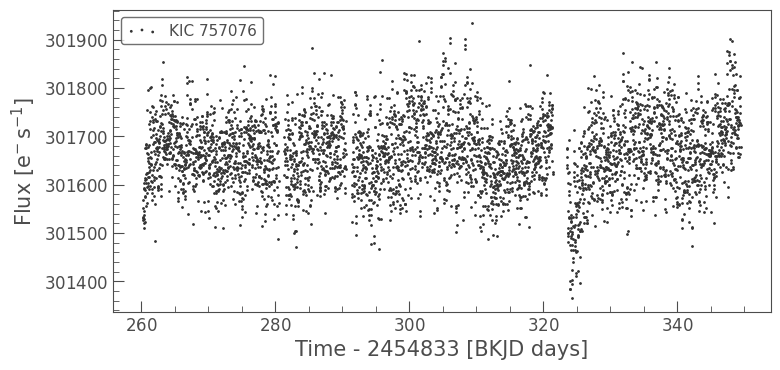

In [3]:
#make edits to the lightcurve, use PDCSAP flux from MAST, remove NaN values, and outliers 
lc = lcf.PDCSAP_FLUX.remove_nans().remove_outliers()
lc.scatter();

In [4]:
#save the lightcurve to a file - output.fits
lc.to_fits(path='output.fits', overwrite=True)

In [5]:
#take a look at the file and check it
from astropy.io import fits
hdu = fits.open('output.fits')
type(hdu)

astropy.io.fits.hdu.hdulist.HDUList

In [6]:
hdu.info()

Filename: output.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  LIGHTCURVE    1 BinTableHDU     28   4133R x 7C   [D, E, E, J, K, D, D]   


In [7]:
#look at the header of the first extension
hdu[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'Unofficial data product' / institution responsible for file          
DATE    = '2020-10-27'         / file creation date.                            
CREATOR = 'lightkurve.LightCurve.to_fits()' / pipeline job and program used t   
TELESCOP= 'KEPLER  '           / telescope                                      
INSTRUME= 'Kepler Photometer'  / detector type                                  
OBJECT  = '757076  '        

In [8]:
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   44 / length of dimension 1                          
NAXIS2  =                 4133 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
TTYPE1  = 'TIME    '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'bkjd    '                                                            
TTYPE2  = 'FLUX    '                                                            
TFORM2  = 'E       '        

In [9]:
#add some keywords to explain who made the data, and what our HLSP is
lc.to_fits(path='output.fits',
             overwrite=True,
             HLSPLEAD='Kepler/K2 GO office',
             HLSPNAME='TUTORIAL',
             CITATION='HEDGES2018')

In [10]:
hdu = fits.open('output.fits')

In [11]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'Unofficial data product' / institution responsible for file          
DATE    = '2020-10-27'         / file creation date.                            
CREATOR = 'lightkurve.LightCurve.to_fits()' / pipeline job and program used t   
TELESCOP= 'KEPLER  '           / telescope                                      
INSTRUME= 'Kepler Photometer'  / detector type                                  
OBJECT  = '757076  '        

In [12]:
#add data columns
demo_vector = lc.fold(1.23456789).phase
demo_vector

array([-0.49992399, -0.49952132, -0.49932792, ...,  0.49923243,
        0.49957413,  0.49988861])

In [13]:
lc.to_fits(path='output.fits',
             overwrite=True,
             HLSPLEAD='Kepler/K2 GO office',
             HLSPNAME='TUTORIAL',
             CITATION='HEDGES2018',
             DEMO_COLUMN=demo_vector)

In [14]:
hdu = fits.open('output.fits')

In [15]:
hdu[1].data.columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'bkjd'
    name = 'FLUX'; format = 'E'; unit = 'counts'
    name = 'FLUX_ERR'; format = 'E'; unit = 'counts'
    name = 'CADENCENO'; format = 'J'
    name = 'DEMO_COLUMN'; format = 'D'
    name = 'SAP_QUALITY'; format = 'K'
    name = 'MOM_CENTR1'; format = 'D'
    name = 'MOM_CENTR2'; format = 'D'
)